<a href="https://colab.research.google.com/github/ninoloid/dicoding-data-analysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmad Muhammad Satria Adiputra
- **Email:** muhammadsatriaadiputra@gmail.com
- **ID Dicoding:** ninoloid

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara berdasarkan tahun?
- Jenis polutan apa yang paling mempengaruhi suhu?

## Import Semua Packages/Library yang Digunakan

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Fetch data

In [8]:
def fetch_and_merge_data():
    # CSV files
    files = [
        "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
        "PRSA_Data_Changping_20130301-20170228.csv",
        "PRSA_Data_Dingling_20130301-20170228.csv",
        "PRSA_Data_Dongsi_20130301-20170228.csv",
        "PRSA_Data_Guanyuan_20130301-20170228.csv",
        "PRSA_Data_Gucheng_20130301-20170228.csv",
        "PRSA_Data_Huairou_20130301-20170228.csv",
        "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
        "PRSA_Data_Shunyi_20130301-20170228.csv",
        "PRSA_Data_Tiantan_20130301-20170228.csv",
        "PRSA_Data_Wanliu_20130301-20170228.csv",
        "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
    ]

    # Base URL prefix
    base_url = "https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/"

    # Initialize an empty list to store DataFrames
    df_list = []

    # Loop through each file, fetch and read into DataFrame
    for file in files:
        file_url = base_url + file
        df = pd.read_csv(file_url)
        df_list.append(df)

    # Merge all DataFrames into one
    merged_df = pd.concat(df_list, ignore_index=True)

    return merged_df


df = fetch_and_merge_data()
df.head()
# df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [13]:
# Get info of the DataFrame
df.info()

# Count missing values
null_data = df.isna().sum()
print("Missing values:\n", null_data)

# Count duplicated data
duplicated_data = df.duplicated().sum()
print("Duplicated data:", duplicated_data)

# Describe
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
Missing values:
 No         0
year       0
mo

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,10.469162,13.787240,0.820624,NaN,1.245914,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


**Insight:**
- No duplicated data found
- No invalid data type found
- Multiple columns with null values found

### Cleaning Data


Since many columns contain missing values (null), deleting rows would result in the loss of significant information. Instead, we will replace the missing values.

- For numeric columns, we will use the mean.
- For non-numeric columns, we will use the mode.

In [12]:

# Function to fill null values
def fill_na(df):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Check if numeric column and fill with mean
            df[column].fillna(df[column].mean(), inplace=True)
        else:  # If non-numeric column, fill with mode
            df[column].fillna(df[column].mode()[0], inplace=True)

fill_na(df)
print("Missing values after replaced:\n", df.isna().sum())

Null data after:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


<ipython-input-12-a89378d39960>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-12-a89378d39960>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Once the missing values have been replaced with non-null values, we can consider the data to be clean.

## Exploratory Data Analysis (EDA)

In [46]:
# Display general information about the data
print(df.info())
print()

# Display descriptive statistics
print(df.describe())
print()

# Check for missing values
print(df.isnull().sum())
print()

# Check the data types of each column
print(df.dtypes)
print()

# Calculate the mean, median, and standard deviation for each column
cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

for col in cols:
    print(f"------------------ {col} ------------------")
    print(f"Mean {col}:", df[col].mean())
    print(f"Median {col}:", df[col].median())
    print(f"Standard Deviation {col}:", df[col].std())
    print()

# Calculating correlation between numerical variables
correlation_matrix = df[['TEMP', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
print("Correlation between pollutants and temp:")
print(correlation_matrix)
print()

# Detecting outliers using IQR (Interquartile Range)
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['PM2.5'] < outlier_lower_bound) | (df['PM2.5'] > outlier_upper_bound)]
print('Outliers in PM2.5:')
print(outliers)
print()

# Monthly Average
monthly_avg = df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
print('Monthly average:', monthly_avg)
print()

# Yearly Average
yearly_avg = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
print('Yearly average:', yearly_avg)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None

                  No           year    

### Explore ...

**Insight:**
### Korelasi Antara Polutan dan Suhu

#### PM2.5:

- Korelasi dengan TEMP: -0.1297
- Interpretasi: Korelasi negatif yang lemah. Meskipun ada hubungan negatif, pengaruh PM2.5 terhadap kenaikan suhu sangat kecil dan hampir tidak signifikan.

#### PM10:

- Korelasi dengan TEMP: -0.0954
- Interpretasi: Korelasi negatif yang sangat lemah. Sama seperti PM2.5, PM10 juga memiliki korelasi negatif yang sangat kecil terhadap suhu, yang berarti PM10 hampir tidak berkontribusi pada kenaikan suhu.

#### SO2:

- Korelasi dengan TEMP: -0.3181
- Interpretasi: Korelasi negatif sedang. Meskipun ada korelasi negatif, SO2 cenderung sedikit mengurangi kenaikan suhu, namun pengaruhnya tidak terlalu besar.

#### NO2:

- Korelasi dengan TEMP: -0.2739
- Interpretasi: Korelasi negatif yang lemah. NO2 sedikit berhubungan dengan penurunan suhu, tetapi pengaruhnya terhadap kenaikan suhu tidak signifikan.

#### CO:

- Korelasi dengan TEMP: -0.3179
- Interpretasi: Korelasi negatif sedang. CO sedikit menurunkan suhu, meskipun efeknya terhadap kenaikan suhu tidak terlalu besar.

#### O3:

- Korelasi dengan TEMP: +0.5853
- Interpretasi: Korelasi positif sedang. Ozon (O3) memiliki korelasi positif yang signifikan dengan suhu, yang berarti kenaikan kadar ozon berkontribusi pada kenaikan suhu yang lebih besar, karena ozon berperan sebagai gas rumah kaca.

---

### Tren
#### PM2.5:

- Tren: Dari 2013 ke 2014, terdapat kenaikan signifikan dari 80.04 ke 85.42, kemudian sedikit penurunan pada 2015 (79.63), diikuti oleh penurunan lebih lanjut pada 2016 (72.10), dan akhirnya kenaikan tajam pada 2017 menjadi 92.48.
- Kesimpulan: Secara umum, PM2.5 menunjukkan fluktuasi yang besar, dengan peningkatan pada 2017 setelah penurunan pada 2016.

#### PM10:

- Tren: PM10 juga mengalami kenaikan dari 102.84 di 2013 menjadi 115.87 di 2014, kemudian sedikit menurun pada 2015 (103.63) dan kembali menurun di 2016 (94.78). Namun, pada 2017, terjadi peningkatan kembali menjadi 111.03.
- Kesimpulan: PM10 menunjukkan tren fluktuatif, dengan kecenderungan naik pada 2014, turun pada 2015 dan 2016, lalu sedikit naik pada 2017.

#### SO2:

- Tren: SO2 menurun secara konsisten dari 19.97 di 2013 menjadi 9.91 di 2016, namun sedikit meningkat pada 2017 menjadi 18.10.
- Kesimpulan: Secara keseluruhan, SO2 menunjukkan penurunan signifikan dari 2013 hingga 2016, namun ada kenaikan yang cukup tajam pada 2017.

#### NO2:

- Tren: NO2 menunjukkan penurunan dari 52.49 di 2013 ke 48.24 di 2015, diikuti dengan sedikit kenaikan pada 2016 (46.49), dan lonjakan signifikan pada 2017 menjadi 57.23.
- Kesimpulan: NO2 menunjukkan tren fluktuatif, dengan penurunan ringan hingga 2015, kemudian kenaikan pada 2016 dan 2017.

#### CO:

- Tren: CO meningkat dari 1207.16 di 2013 menjadi 1256.06 di 2014, kemudian sedikit menurun pada 2015 (1257.39), turun lebih lanjut pada 2016 (1140.80), dan kemudian lonjakan besar pada 2017 menjadi 1590.16.
- Kesimpulan: CO menunjukkan tren naik turun, dengan penurunan pada 2016 dan lonjakan besar pada 2017.

#### O3:

- Tren: Ozon (O3) menunjukkan sedikit kenaikan dari 57.33 di 2013 menjadi 58.27 di 2014, kemudian sedikit meningkat lagi pada 2015 menjadi 59.21. Namun, pada 2016, O3 mengalami penurunan signifikan menjadi 57.45 dan terus menurun lebih lanjut pada 2017 (40.19).
- Kesimpulan: O3 menunjukkan tren penurunan, dengan penurunan yang lebih signifikan pada 2017.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

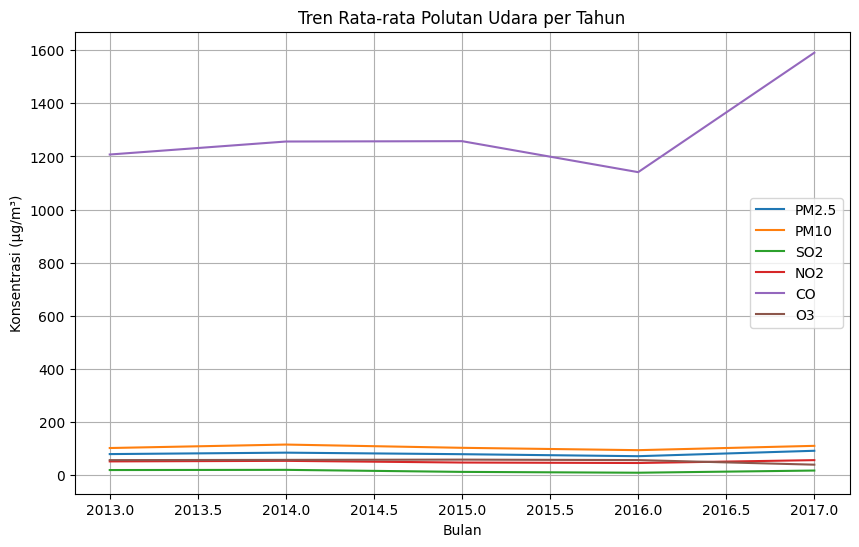

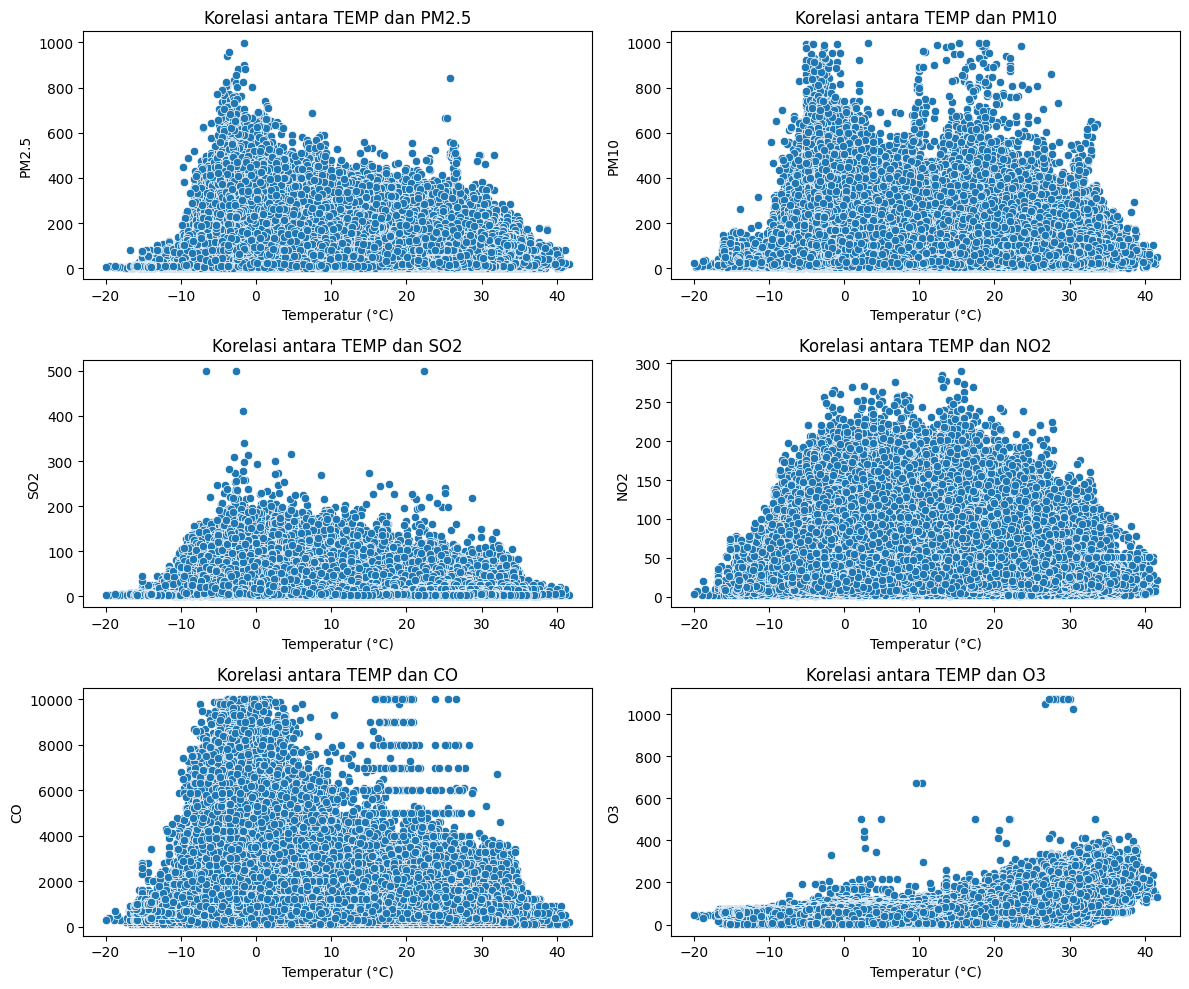

In [51]:
# Visualization of yearly trend

# Plotting
yearly_avg.plot(kind='line', figsize=(10, 6))

# Set legends
plt.title('Tren Rata-rata Polutan Udara per Tahun')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi (µg/m³)')

# Adjust layout
plt.grid(True)

# Show visualization
plt.show()


# List of pollutants to compare against temperature
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Create a figure with subplots for each pollutant
plt.figure(figsize=(12, 10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)  # Create subplots (3 rows, 2 columns)
    sns.scatterplot(x=df['TEMP'], y=df[pollutant])
    plt.title(f'Korelasi antara TEMP dan {pollutant}')
    plt.xlabel('Temperatur (°C)')
    plt.ylabel(pollutant)

# Adjust layout
plt.tight_layout()

# Show the vusualization
plt.show()

## Conclusion

- Secara keseluruhan, sebagian besar polutan menunjukkan fluktuasi tahunan, dengan beberapa polutan mengalami penurunan yang lebih konsisten (seperti SO2 dan O3), sementara polutan lain seperti CO dan NO2 mengalami lonjakan tajam pada 2017.
- Secara keseluruhan, O3 memiliki pengaruh yang lebih kuat terhadap kenaikan suhu (korelasi positif), sementara PM2.5, PM10, SO2, NO2, dan CO cenderung sedikit mengurangi kenaikan suhu, meskipun efeknya relatif lemah.